## **4. Model Training and Evaluation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df = df.drop(columns='Id')

In [12]:
y = y.apply(lambda x: 0 if x == 'Iris-setosa' else (1 if x == 'Iris-versicolor' else 2))

Label Encoding -> Teks (string) diubah menjadi angka numerik agar bisa diproses oleh model machine learning

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data dibagi menjadi 80% training dan 20% testing.

In [14]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = KNN.predict(X_test)

In [16]:
knn_report = classification_report(y_test, y_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



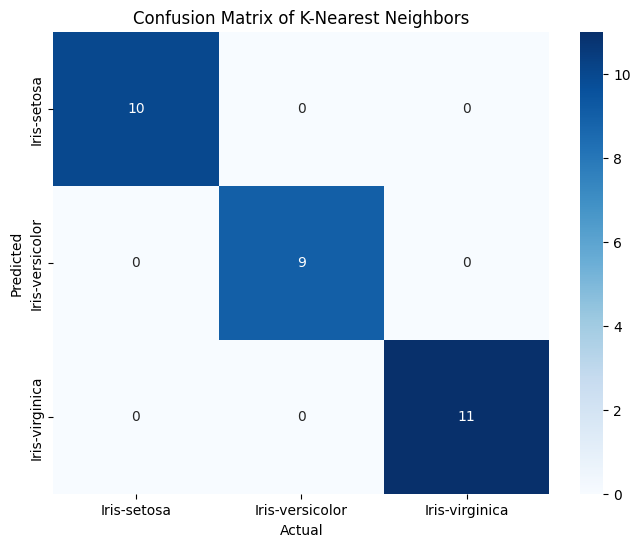

In [17]:
knn_cm = confusion_matrix(y_test, y_pred)

class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

plt.figure(figsize=(8,6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix of K-Nearest Neighbors')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

###  **Pelatihan dan Evaluasi Model KNN pada Dataset Iris**

Model **K-Nearest Neighbors (KNN)** dengan `k=3` dilatih menggunakan data latih yang telah dibagi sebelumnya (80% dari dataset). Setelah pelatihan, model digunakan untuk memprediksi spesies bunga pada data uji (20% sisanya). Hasil prediksi kemudian dievaluasi menggunakan dua metode utama: **classification report** dan **confusion matrix**.

Evaluasi menunjukkan performa yang sempurna:  
- **Akurasi = 100%**  
- Semua nilai **precision**, **recall**, dan **f1-score** bernilai **1.00** untuk ketiga kelas (*Iris-setosa*, *Iris-versicolor*, *Iris-virginica*)  
- Confusion matrix tidak menunjukkan satupun kesalahan klasifikasi — semua 30 sampel data uji diprediksi dengan benar  

Hal ini terjadi karena dataset Iris bersifat sangat terpisah secara spasial, terutama berkat fitur *petal length* dan *petal width* yang membedakan ketiga spesies dengan jelas.

In [18]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred_clf = clf.predict(X_test)

In [20]:
clf_report = classification_report(y_test, y_pred_clf)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



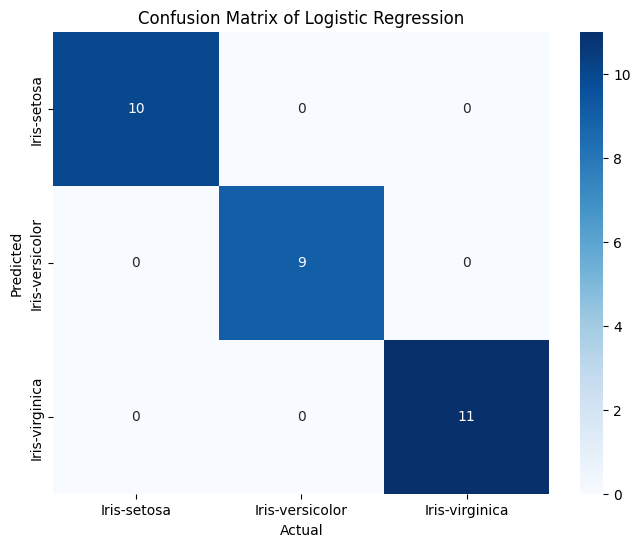

In [21]:
clf_cm = confusion_matrix(y_test, y_pred_clf)

plt.figure(figsize=(8,6))
sns.heatmap(clf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### **Pelatihan dan Evaluasi Model Logistic Regression pada Dataset Iris**

Model **Logistic Regression** dilatih menggunakan data latih yang telah dibagi sebelumnya (80% dari dataset). Meskipun termasuk model linier dan biasanya digunakan untuk klasifikasi biner, versi multinomial dari Logistic Regression mampu menangani tiga kelas spesies bunga Iris secara efektif. Setelah pelatihan, model digunakan untuk memprediksi spesies pada data uji (20% sisanya), dan hasil prediksi dievaluasi menggunakan **classification report** dan **confusion matrix**.

Evaluasi menunjukkan performa yang sempurna:  
- **Akurasi = 100%**  
- Semua nilai **precision**, **recall**, dan **f1-score** bernilai **1.00** untuk ketiga kelas (*Iris-setosa*, *Iris-versicolor*, *Iris-virginica*)  
- Confusion matrix tidak menunjukkan satupun kesalahan klasifikasi — semua 30 sampel data uji diprediksi dengan benar  

## **5. Kesimpulan Perbandingan Model: KNN vs Logistic Regression**

Baik model **K-Nearest Neighbors (KNN)** maupun **Logistic Regression** berhasil mencapai **akurasi 100%** pada dataset Iris, dengan semua metrik evaluasi (precision, recall, f1-score) bernilai sempurna untuk ketiga kelas spesies. Ini menunjukkan bahwa kedua model mampu mengklasifikasikan semua sampel data uji tanpa kesalahan.

Perbedaan utamanya terletak pada pendekatan:  
- **KNN** adalah model *non-parametrik* yang mengandalkan kemiripan jarak antar data.  
- **Logistic Regression** adalah model *linier parametrik* yang mempelajari batas keputusan berbentuk garis lurus (atau hyperplane).

Namun, karena struktur dataset Iris yang sangat terpisah secara linear, terutama berkat fitur petal yang membentuk kelompok jelas, bahkan model linier sederhana seperti Logistic Regression pun mampu bekerja optimal.